In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load Data
train = pd.read_csv(r'C:\Users\roshe\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\roshe\Downloads\test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#remove unnecessary variables from train and test data
train.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)
test.drop(columns = [ 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)

In [8]:
#Display summary statistics of numerical features
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Check missing values
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

C:\Users\roshe\AppData\Local\Temp\ipykernel_21012\3893455939.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],kde = True)


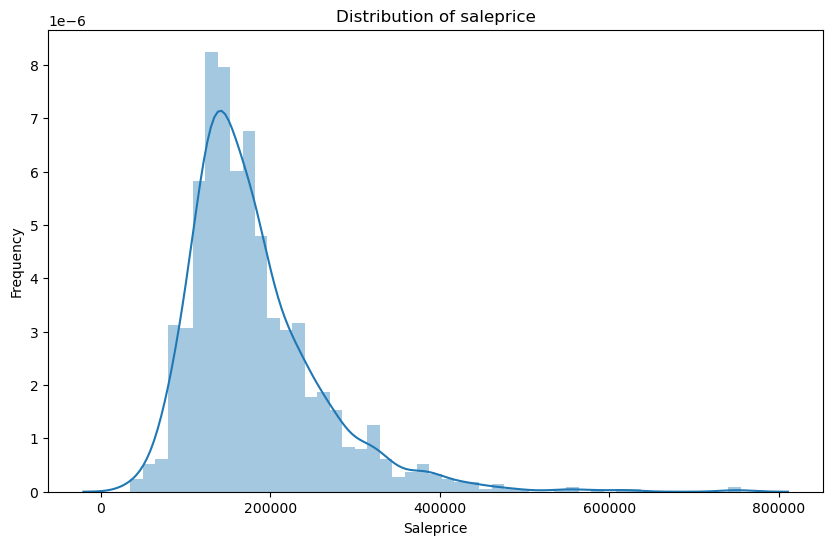

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize distribution of target variables
plt.figure(figsize = (10,6))
sns.distplot(train['SalePrice'],kde = True)
plt.title("Distribution of saleprice")
plt.xlabel('Saleprice')
plt.ylabel('Frequency')
plt.show()

In [5]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


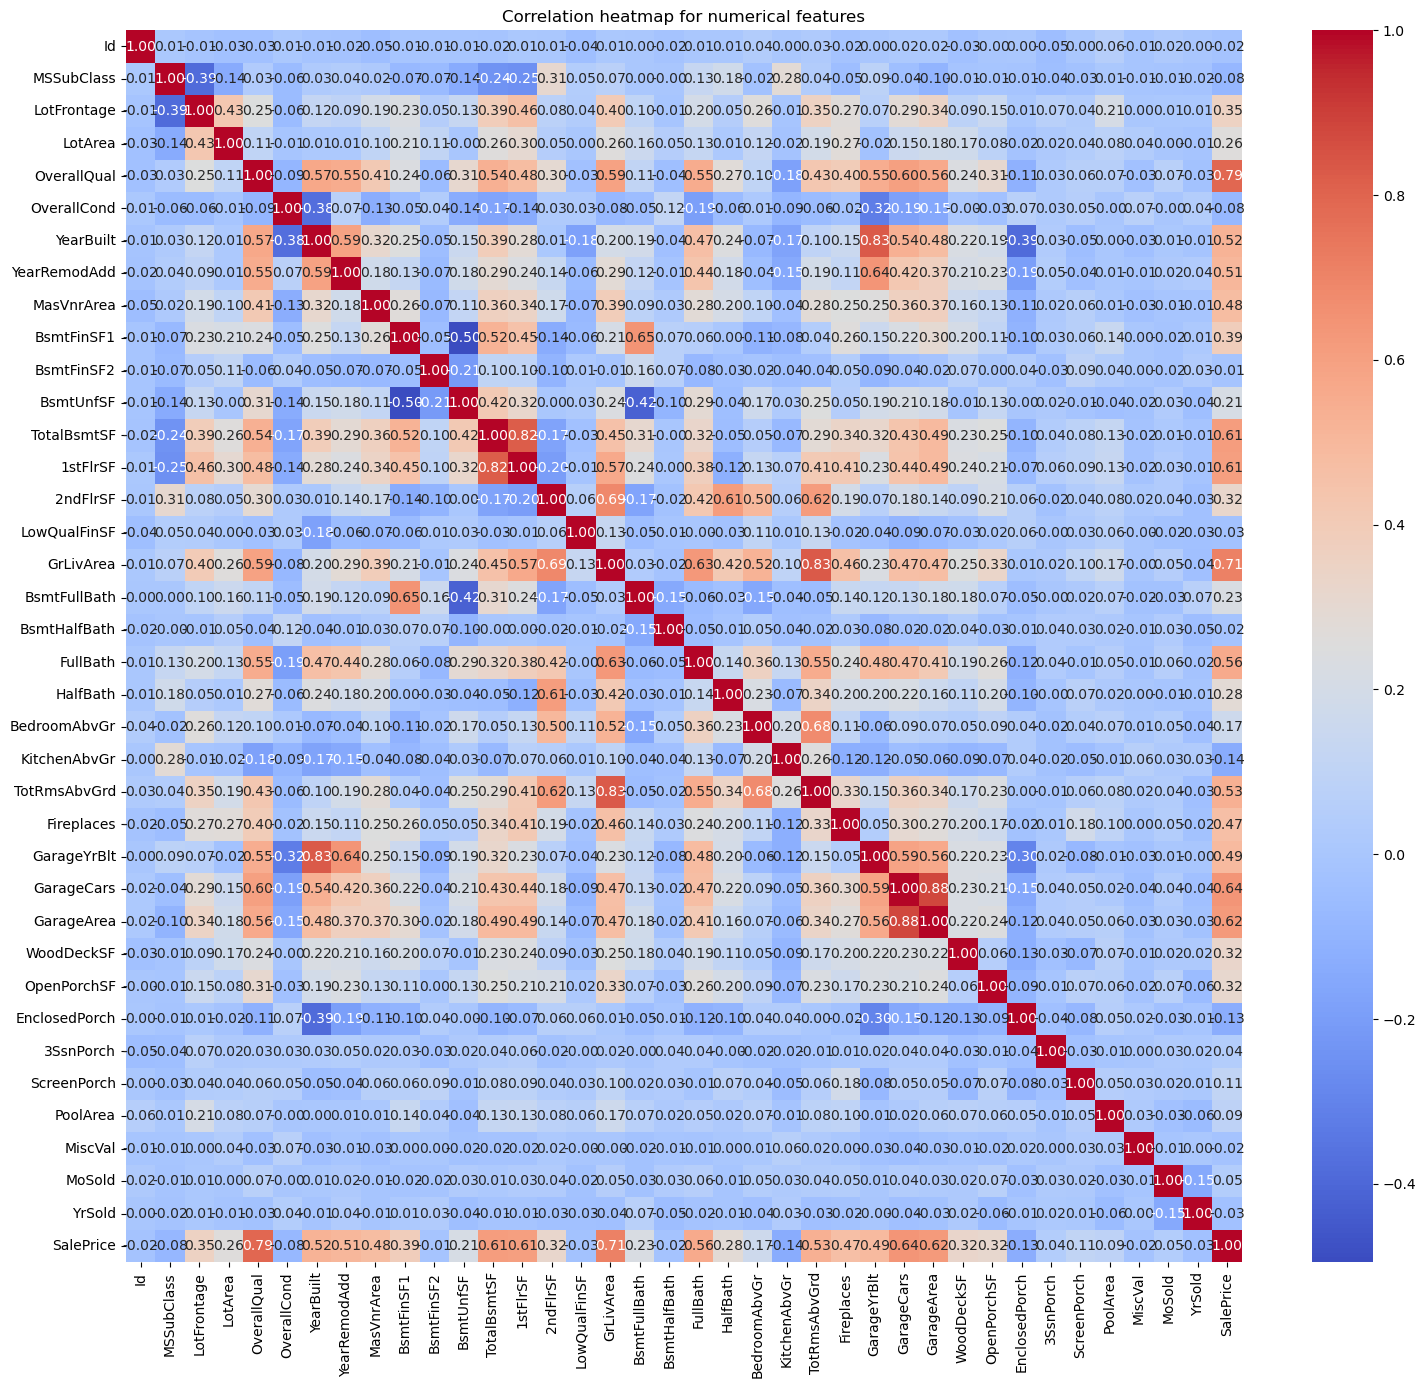

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train' is your DataFrame containing the dataset
# Selecting only numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64'])

# Generating the correlation heatmap for numerical features
plt.figure(figsize=(18, 16))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap for numerical features')
plt.show()



In [8]:
#Short listing some important features
important_features = ['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
train[important_features].describe()

,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


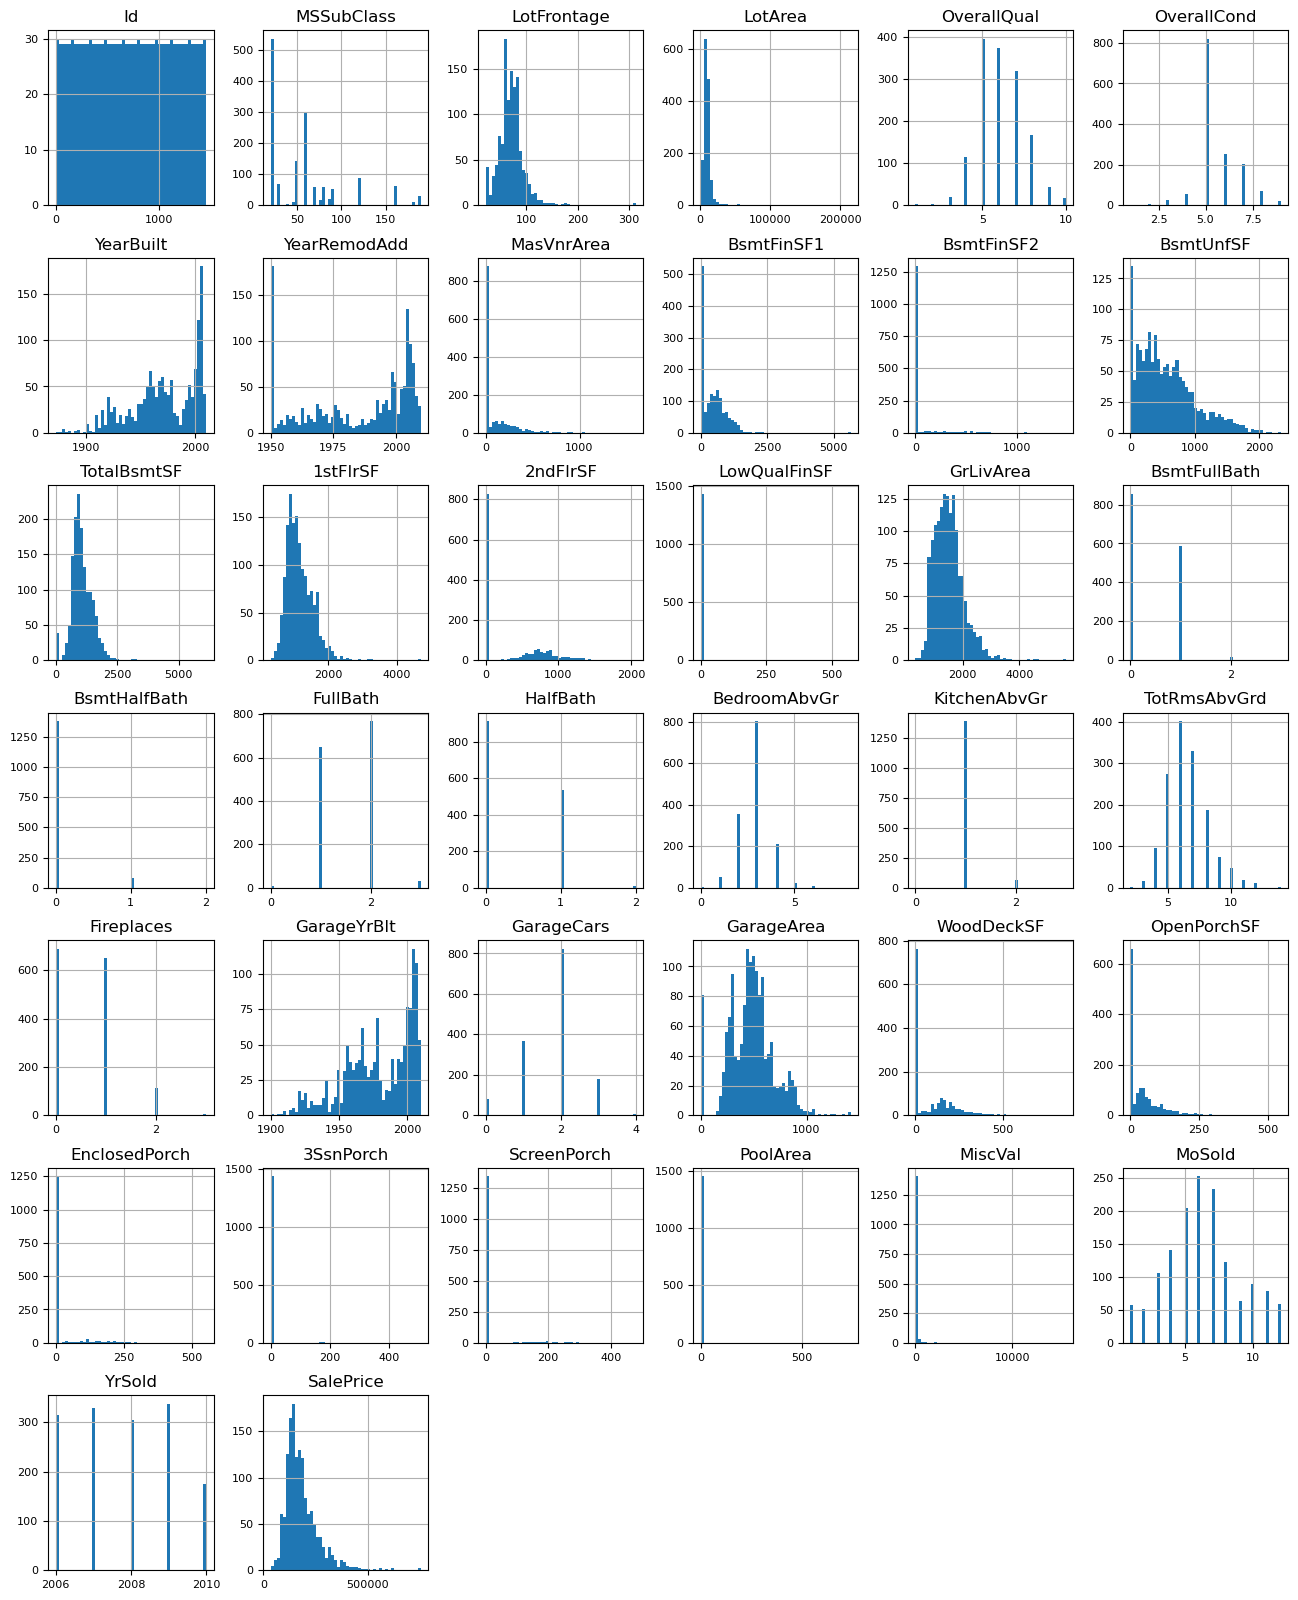

In [9]:
numerical_features = train.select_dtypes(exclude=['object'])
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


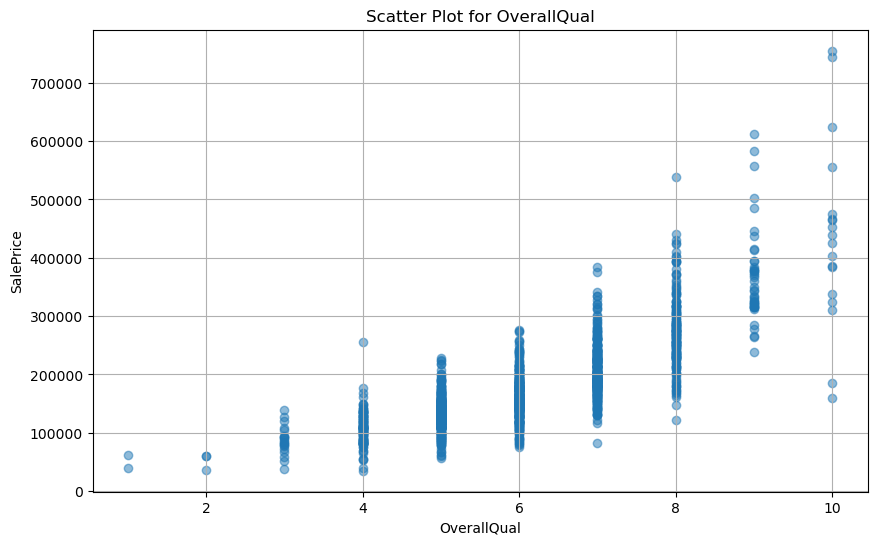

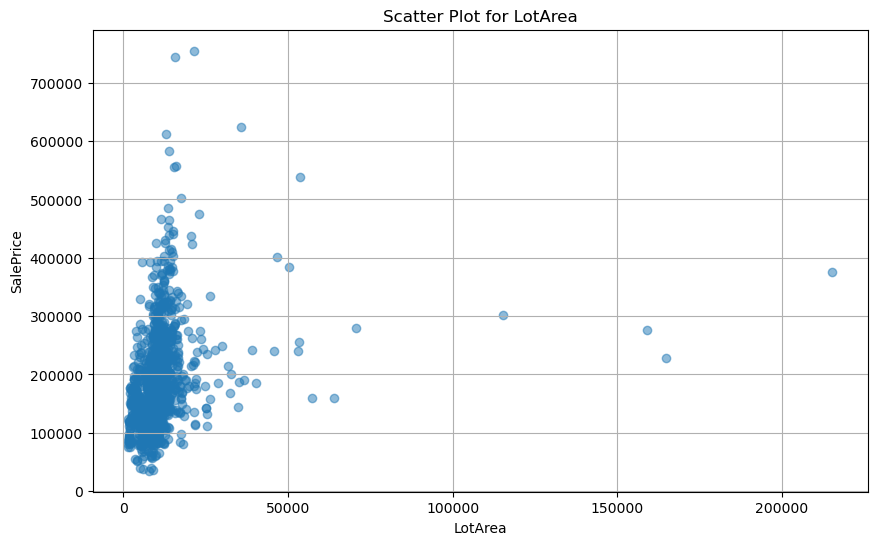

<Axes: xlabel='SalePrice'>

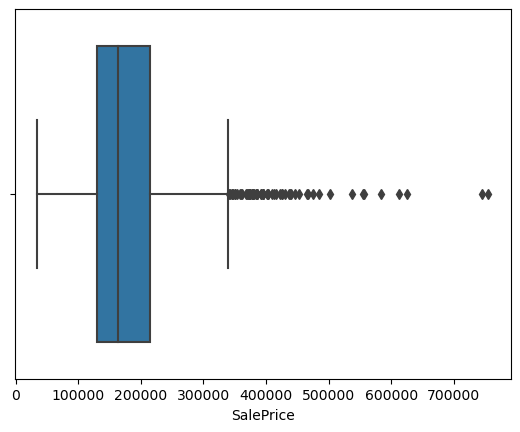

In [10]:
import matplotlib.pyplot as plt

# Scatter plot for OverallQual
plt.figure(figsize=(10, 6))
plt.scatter(train['OverallQual'], train['SalePrice'], alpha=0.5)
plt.title('Scatter Plot for OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

# Scatter plot for LotArea
plt.figure(figsize=(10, 6))
plt.scatter(train['LotArea'], train['SalePrice'], alpha=0.5)
plt.title('Scatter Plot for LotArea')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

sns.boxplot(x=train.SalePrice)

In [11]:
#calculate the 99.5th percentile of the saleprice column in dataframe
train['SalePrice'].quantile(0.995)

527331.9149999974

In [12]:
#calculate the index values of the rows where the 'SalePrice' is greater than the 99.5th percentile value.
rows_2_drop=train[train['SalePrice']>train['SalePrice'].quantile(0.995)].index
train.drop(rows_2_drop,inplace=True)

In [13]:
#Calculate the index values of the rows where the 'GrLivArea' is greater than 4000 and drop that rows
rows_2_drop=train[train['GrLivArea']>4000].index
train.drop(rows_2_drop,inplace=True)
train.shape

(1450, 81)

In [14]:
#finding rows where 'lotarea' is greater than 100000
train[train['LotArea']>100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [15]:
#drop the above rows
rows_2_drop = train[train['LotArea']>100000].index
train.drop(rows_2_drop,inplace=True)
train.shape

(1446, 81)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define Ridge Regression model
ridge_model = Ridge(alpha=1.0)
# Create a pipeline with preprocessing and Ridge Regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', ridge_model)])

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# Evaluate the model on the validation data
y_val_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse)

Mean Squared Error on Validation Set: 393590801.8448947
